# import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import pickle

# read data

In [49]:
#data_train=pd.read_csv("D:/studies/depi/ottawa/second_term/ai_for_cs/project/dataset/training.csv")
data_train=pd.read_csv("D:/project_cs/training.csv")
data_validate=pd.read_csv("D:/project_cs/validation.csv")
#data_validate=pd.read_csv("D:/studies/depi/ottawa/second_term/ai_for_cs/project/dataset/validation.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_14256\492583339.py:2: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train=pd.read_csv("D:/project_cs/training.csv")


In [50]:
#showing training data
data_train

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-746-24675-17,172.16.0.5,746,192.168.50.1,24675,17,2018-12-01 11:07:56.502353,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,172.16.0.5-192.168.50.1-851-5766-17,172.16.0.5,851,192.168.50.1,5766,17,2018-12-01 11:06:32.000712,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
2,172.16.0.5-192.168.50.1-935-24548-17,172.16.0.5,935,192.168.50.1,24548,17,2018-12-01 11:08:48.524934,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,172.16.0.5-192.168.50.1-719-12510-17,172.16.0.5,719,192.168.50.1,12510,17,2018-12-01 11:13:23.585969,48,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,172.16.0.5-192.168.50.1-984-61717-17,172.16.0.5,984,192.168.50.1,61717,17,2018-12-01 11:12:57.299430,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001995,172.16.0.5-192.168.50.1-564-874-17,172.16.0.5,564,192.168.50.1,874,17,2018-12-01 11:12:51.786340,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4001996,172.16.0.5-192.168.50.1-564-42551-17,172.16.0.5,564,192.168.50.1,42551,17,2018-12-01 11:12:08.057584,47,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4001997,172.16.0.5-192.168.50.1-732-46750-17,172.16.0.5,732,192.168.50.1,46750,17,2018-12-01 11:09:29.349479,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4001998,172.16.0.5-192.168.50.1-582-37652-17,172.16.0.5,582,192.168.50.1,37652,17,2018-12-01 11:11:35.320319,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [51]:
#getting some info about training data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002000 entries, 0 to 4001999
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  int64  
 3   Destination IP               object 
 4   Destination Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow Duration                int64  
 8   Total Fwd Packets            int64  
 9   Total Backward Packets       int64  
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        float64
 13  Fwd Packet Length Min        float64
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        float64
 17  Bwd Packet Length Min        float64
 18  Bwd Packet Length Mean       float64
 19  

In [11]:
#show validation data
data_validate

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length MeanFwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
3,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
4,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71408,2,0,2656.0,0.0,1328.0,1328.0,1328.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
71409,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
71410,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS
71411,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DrDoS_DNS


In [52]:
#getting some info about validation data
data_validate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71413 entries, 0 to 71412
Data columns (total 87 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      71413 non-null  object 
 1   Source IP                    71413 non-null  object 
 2   Source Port                  71413 non-null  int64  
 3   Destination IP               71413 non-null  object 
 4   Destination Port             71413 non-null  int64  
 5   Protocol                     71413 non-null  int64  
 6   Timestamp                    71413 non-null  object 
 7   Flow Duration                71413 non-null  int64  
 8   Total Fwd Packets            71413 non-null  int64  
 9   Total Backward Packets       71413 non-null  int64  
 10  Total Length of Fwd Packets  71413 non-null  float64
 11  Total Length of Bwd Packets  71413 non-null  float64
 12  Fwd Packet Length Max        71413 non-null  float64
 13  Fwd Packet Lengt

In [53]:
#drop some coulmns in training and validation data
data_train=data_train.drop(['Flow ID','Source IP','Source Port','Destination IP','Destination Port','Protocol','Timestamp','SimillarHTTP'], axis=1)
data_validate=data_validate.drop(['Flow ID','Source IP','Source Port','Destination IP','Destination Port','Protocol','Timestamp','SimillarHTTP'], axis=1)

In [54]:
#remove inf and -inf in training data
data_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [55]:
#obtain sum of number null in training data
data_train.isnull().sum().sum()

243210

In [56]:
#replace null in training data
data_train['Flow Bytes/s'].fillna(value=data_train['Flow Bytes/s'].mean(), inplace=True)
data_train['Flow Packets/s'].fillna(value=data_train['Flow Packets/s'].mean(), inplace=True)

In [57]:
#count label of training data
data_train['Label'].value_counts()

DrDoS_DNS    4000000
BENIGN          2000
Name: Label, dtype: int64

In [58]:
#remove inf and -inf in validation data
data_validate.replace([np.inf, -np.inf], np.nan, inplace=True)

In [59]:
#obtain sum of number null in validation data
data_validate.isnull().sum().sum()

4964

In [60]:
##eplace null in validation data
data_validate['Flow Bytes/s'].fillna(value=data_validate['Flow Bytes/s'].mean(), inplace=True)
data_validate['Flow Packets/s'].fillna(value=data_validate['Flow Packets/s'].mean(), inplace=True)

In [61]:
#count lavbel of validation data
data_validate['Label'].value_counts()

DrDoS_DNS    71011
BENIGN         402
Name: Label, dtype: int64

In [62]:
#convert label from nomial to numerical in training and validation data
data_train=data_train.replace({"Label":{"DrDoS_DNS":1,"BENIGN":0}})
data_validate=data_validate.replace({"Label":{"DrDoS_DNS":1,"BENIGN":0}})

In [63]:
#split training and validation data to features (x) and label (y)
x_train=data_train.iloc[:,0:-1]
y_train=data_train.iloc[:,-1]
x_validate=data_validate.iloc[:,0:-1]
y_validate=data_validate.iloc[:,-1]

In [64]:
#apply decision tree to obtain features importance
clf_d = DecisionTreeClassifier(criterion="entropy",random_state=0)
clf_d.fit(x_train,y_train)
important_feature = clf_d.feature_importances_
important_feature

array([8.05982493e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.54708836e-01, 0.00000000e+00, 0.00000000e+00,
       3.13987170e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.09564079e-03, 1.18159223e-04, 2.60534080e-04, 2.60569442e-04,
       0.00000000e+00, 0.00000000e+00, 7.97363543e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.30775193e-04, 3.23453785e-03, 1.21621225e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.85527879e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.99024848e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.54112134e-02,
       0.00000000e+00, 0.00000000e+00, 1.52015016e-04, 1.30746839e-03,
       4.92291045e-04, 0.00000000e+00, 1.00443778e-03, 0.00000000e+00,
      

In [87]:
#summarize features importance
for i,v in enumerate(important_feature):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00008
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.75471
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00031
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00110
Feature: 21, Score: 0.00012
Feature: 22, Score: 0.00026
Feature: 23, Score: 0.00026
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00080
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00013
Feature: 34, Score: 0.00323
Feature: 35, Score: 0.00122
Fe

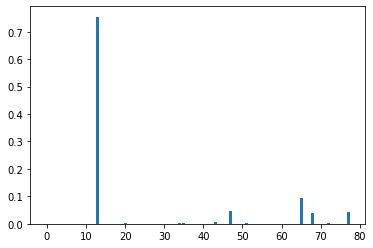

In [65]:
#plot features importance
plt.bar([x for x in range(len(important_feature))], important_feature)
plt.show()

In [67]:
#sort features importance
sorted_importance_feature=np.sort(important_feature)[::-1]
print(sorted_importance_feature)

[7.54708836e-01 9.53860287e-02 4.54112134e-02 4.17199019e-02
 4.09358994e-02 6.99024848e-03 3.23453785e-03 2.63842909e-03
 1.30746839e-03 1.21621225e-03 1.09564079e-03 1.00443778e-03
 7.97363543e-04 6.85527879e-04 4.92291045e-04 3.60536883e-04
 3.13987170e-04 3.03227652e-04 2.90725270e-04 2.60569442e-04
 2.60534080e-04 1.52015016e-04 1.30775193e-04 1.18159223e-04
 1.04835344e-04 8.05982493e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [68]:
#sort features importance to obtain index of fatures
sorted_importance_feature_index=np.argsort(important_feature)[::-1]
sorted_importance_feature_index

array([13, 65, 47, 77, 68, 43, 34, 72, 51, 35, 20, 54, 26, 39, 52, 62, 16,
       61, 66, 23, 22, 50, 33, 21, 67,  0, 53, 55, 69, 70, 71, 73, 19, 18,
       17, 74, 15, 14, 75, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,
       24, 25, 64, 58, 49, 48, 56, 46, 45, 44, 57, 42, 41, 40, 76, 27, 37,
       36, 59, 60, 63, 32, 31, 30, 29, 28, 38], dtype=int64)

In [69]:
#importance features index
impotrant_index = sorted_importance_feature_index[:25]

In [70]:
#delet not importance feature in training and validation data
#show the new shape of training and validation data
x__train=x_train.iloc[:,impotrant_index]
x__validate=x_validate.iloc[:,impotrant_index]
print(x__train.shape)
print(x__validate.shape)

(4002000, 25)
(71413, 25)


f1 score in training 0.9999981250021094
accuracy in training 0.9999962518740629
f1 score in validation 0.9999295933310803
accuracy in validation 0.9998599694733452


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


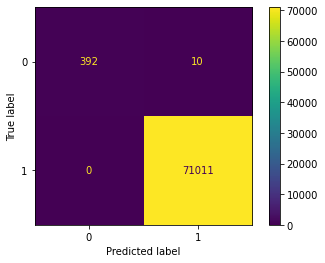

In [71]:
#apply CatBoostClassifier and obtian accuracy and f1-score
#draw confusion matrix of our model
clf_c_im = CatBoostClassifier(iterations=400,verbose=0,learning_rate=0.01,random_state=0)
clf_c_im.fit(x__train, y_train)
y_pred_c_im_train=clf_c_im.predict(x__train)
print("f1 score in training",f1_score(y_train,y_pred_c_im_train))
print("accuracy in training",accuracy_score(y_train,y_pred_c_im_train))
y_pred_c_im=clf_c_im.predict(x__validate)
print("f1 score in validation",f1_score(y_validate, y_pred_c_im))
print("accuracy in validation",accuracy_score(y_validate, y_pred_c_im))
plot_confusion_matrix(clf_c_im,x__validate,y_validate)  

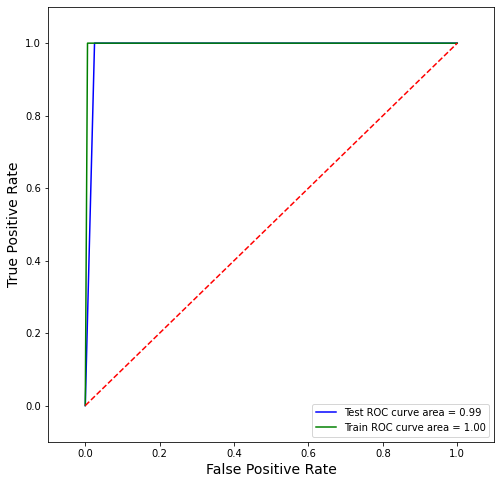

In [119]:
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_validate, y_pred_c_im)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, y_pred_c_im_train)
 # auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

In [72]:
#save model
pickle.dump(clf_c_im, open('D:/project_cs/catboost_im.sav','wb'))

In [117]:
import timeit
sst = timeit.timeit()
out=clf_c_im.predict(x__validate.iloc[:1])
end = timeit.timeit()
end-sst

0.0003946999931940809

In [124]:
import datetime
start = datetime.datetime.now()
out=clf_c_im.predict(x__validate.iloc[:1])
end = datetime.datetime.now()
(end-start)

datetime.timedelta(microseconds=2028)

In [106]:
(end-start).seconds

0

In [120]:
#importance 10 features index 
impotrant_index_10 = sorted_importance_feature_index[:10]

In [121]:
#delet not importance feature in training and validation data
#show the new shape of training and validation data
x__train_10=x_train.iloc[:,impotrant_index_10]
x__validate_10=x_validate.iloc[:,impotrant_index_10]
print(x__train_10.shape)
print(x__validate_10.shape)

(4002000, 10)
(71413, 10)


f1 score in training 0.999997
accuracy in training 0.9999962518740629
f1 score in validation 0.9999366317671992
accuracy in validation 0.9998599694733452


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


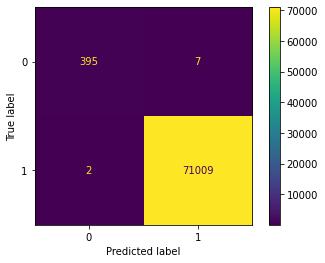

In [123]:
#apply CatBoostClassifier and obtian accuracy and f1-score
#draw confusion matrix of our model
clf_c_im_10 = CatBoostClassifier(iterations=400,verbose=0,learning_rate=0.01,random_state=0)
clf_c_im_10.fit(x__train_10, y_train)
y_pred_c_im_train_10=clf_c_im_10.predict(x__train_10)
print("f1 score in training",f1_score(y_train,y_pred_c_im_train_10))
print("accuracy in training",accuracy_score(y_train,y_pred_c_im_train))
y_pred_c_im_10=clf_c_im_10.predict(x__validate_10)
print("f1 score in validation",f1_score(y_validate, y_pred_c_im_10))
print("accuracy in validation",accuracy_score(y_validate, y_pred_c_im))
plot_confusion_matrix(clf_c_im_10,x__validate_10,y_validate)  

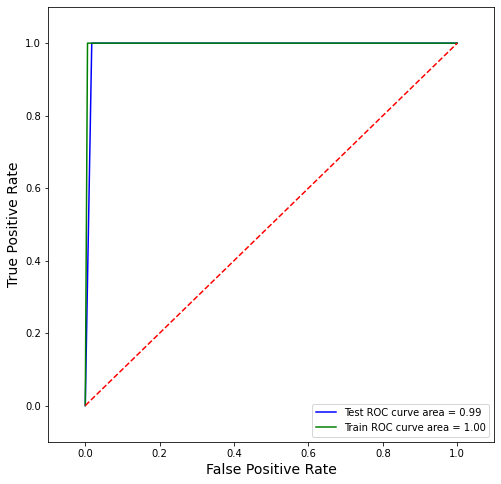

In [144]:
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_validate, y_pred_c_im_10)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, y_pred_c_im_train_10)
 # auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

In [125]:
#save model
pickle.dump(clf_c_im, open('D:/project_cs/catboost_im_10.sav','wb'))

In [141]:
import timeit
sst = timeit.timeit()
out=clf_c_im_10.predict(x__validate.iloc[:1])
end = timeit.timeit()
end-sst

0.00040600000647827983

In [143]:
import datetime
start = datetime.datetime.now()
out=clf_c_im.predict(x__validate.iloc[:1])
end = datetime.datetime.now()
(end-start)

datetime.timedelta(microseconds=1000)